# Food Demand Prediction

### Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

### Importing the dataset

In [2]:
train = pd.read_csv('Analytics Vidya/train/train.csv')
meal = pd.read_csv('Analytics Vidya/train/meal_info.csv')
centerinfo = pd.read_csv('Analytics Vidya/train/fulfilment_center_info.csv')

### Analysing the Train data

The first 5 values of the data

In [3]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


The dimension of the data

In [4]:
train.shape

(456548, 9)

The information of the columns in the data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


Null value count

In [6]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

Unique value count

In [7]:
train.nunique()

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
dtype: int64

In [8]:
len(train[train['homepage_featured']==1])

49855

In [9]:
len(train[train['emailer_for_promotion']==1])

37050

In [10]:
train['checkout_price'].max()

866.27

In [11]:
train['checkout_price'].min()

2.97

In [12]:
train['base_price'].max()

866.27

In [13]:
train['base_price'].min()

55.35

In [14]:
train['num_orders'].max()

24299

In [15]:
train['num_orders'].min()

13

### Analysing the meal_info data

The first 5 values of the data

In [16]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


The dimension of the dataset

In [17]:
meal.shape

(51, 3)

The information of the columns in the data

In [18]:
meal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


Null value count

In [19]:
meal.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

Unique value count

In [20]:
meal.nunique()

meal_id     51
category    14
cuisine      4
dtype: int64

In [21]:
meal['category'].unique()

array(['Beverages', 'Extras', 'Soup', 'Other Snacks', 'Salad',
       'Rice Bowl', 'Starters', 'Sandwich', 'Pasta', 'Desert', 'Biryani',
       'Pizza', 'Fish', 'Seafood'], dtype=object)

In [22]:
meal['cuisine'].unique()

array(['Thai', 'Indian', 'Italian', 'Continental'], dtype=object)

### Analysing the fulfilment_center_info data

The first 5 values of the data

In [23]:
centerinfo.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


The dimension of the data

In [24]:
centerinfo.shape

(77, 5)

The information of the columns in the data

In [25]:
centerinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


Null value count

In [26]:
centerinfo.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

Unique value count

In [27]:
centerinfo.nunique()

center_id      77
city_code      51
region_code     8
center_type     3
op_area        30
dtype: int64

In [28]:
centerinfo['region_code'].unique()

array([56, 34, 77, 85, 23, 71, 35, 93], dtype=int64)

In [29]:
centerinfo['center_type'].unique()

array(['TYPE_A', 'TYPE_B', 'TYPE_C'], dtype=object)

### Combining to a single dataframe

Combining the training data

In [30]:
df = pd.merge(train, centerinfo, on='center_id')
df = pd.merge(df, meal, on='meal_id')
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [31]:
df.shape

(456548, 15)

In [32]:
df.nunique()

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
city_code                    51
region_code                   8
center_type                   3
op_area                      30
category                     14
cuisine                       4
dtype: int64

### Visualization

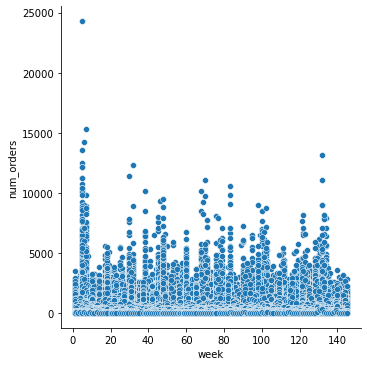

In [33]:
sns.relplot(data=df,x='week',y='num_orders')

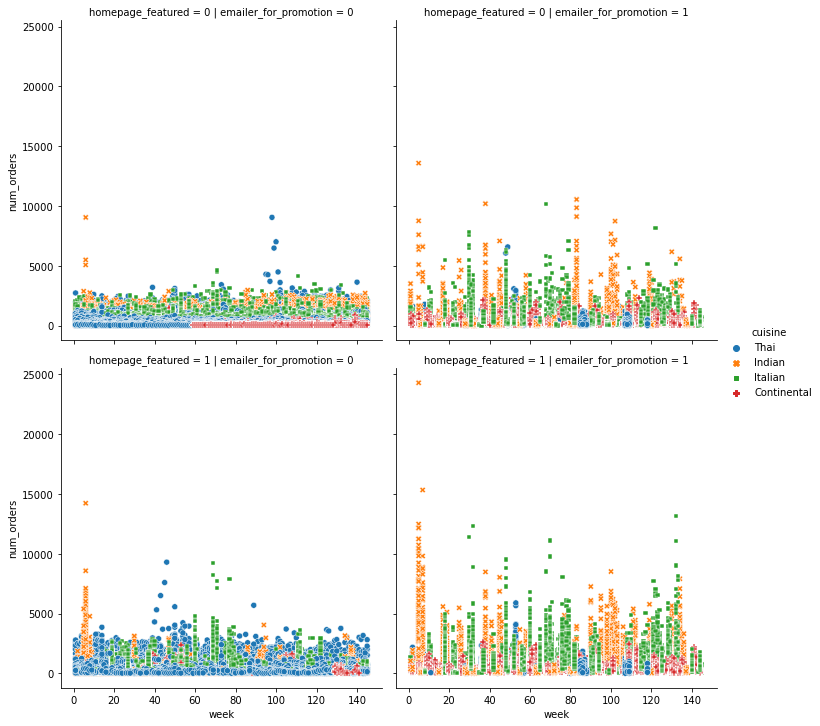

In [34]:
sns.relplot(data=df,x='week',y='num_orders',hue='cuisine',col='emailer_for_promotion',row='homepage_featured',style='cuisine')

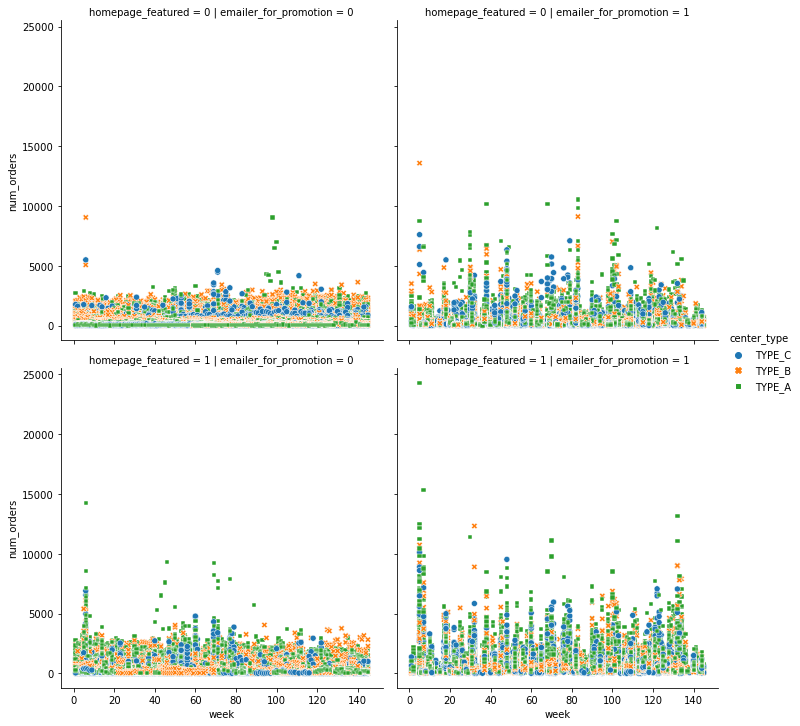

In [35]:
sns.relplot(data=df,x='week',y='num_orders',hue='center_type',col='emailer_for_promotion',row='homepage_featured',
            style='center_type')

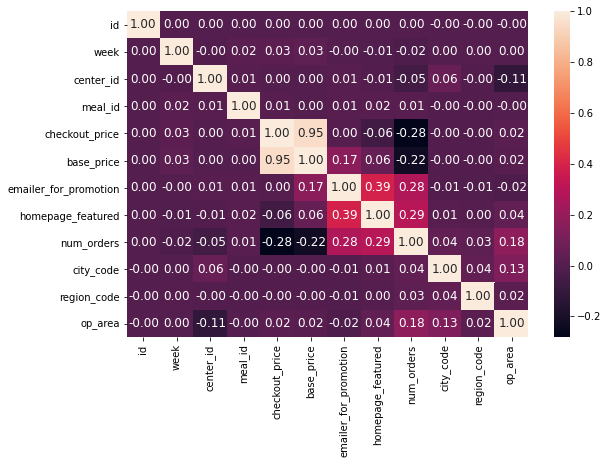

In [36]:
plt.subplots(figsize=(9, 6))
ax = sns.heatmap(df.corr(), annot=True,fmt='.2f',annot_kws={'size':'12'})

### Seperating the data

Seperating the data for training

In [37]:
X=df.drop(['id','center_id','meal_id','checkout_price','base_price','center_type','num_orders'],axis=1)
X.head()

,week,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,category,cuisine
0,1,0,0,647,56,2.0,Beverages,Thai
1,2,0,0,647,56,2.0,Beverages,Thai
2,3,0,0,647,56,2.0,Beverages,Thai
3,4,0,0,647,56,2.0,Beverages,Thai
4,5,0,0,647,56,2.0,Beverages,Thai


In [38]:
y=df['num_orders']
y.head()

0    177
1    323
2     96
3    163
4    215
Name: num_orders, dtype: int64

### Encoding the catergorical values

Encoding the training values

In [39]:
le = LabelEncoder()

In [40]:
X.category = le.fit_transform(X.category)
X.cuisine=le.fit_transform(X.cuisine)

In [41]:
X.head()

,week,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,category,cuisine
0,1,0,0,647,56,2.0,0,3
1,2,0,0,647,56,2.0,0,3
2,3,0,0,647,56,2.0,0,3
3,4,0,0,647,56,2.0,0,3
4,5,0,0,647,56,2.0,0,3


### Spliting the data

In [42]:
X_train = X[X['week']<=125]
X_train.head()

,week,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,category,cuisine
0,1,0,0,647,56,2.0,0,3
1,2,0,0,647,56,2.0,0,3
2,3,0,0,647,56,2.0,0,3
3,4,0,0,647,56,2.0,0,3
4,5,0,0,647,56,2.0,0,3


In [43]:
idx = X_train.shape
idx

(390907, 8)

In [44]:
X_test = X[X['week']>125]
X_test.head()

,week,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,category,cuisine
125,126,0,0,647,56,2.0,0,3
126,127,0,0,647,56,2.0,0,3
127,128,0,0,647,56,2.0,0,3
128,129,0,0,647,56,2.0,0,3
129,130,0,0,647,56,2.0,0,3


In [45]:
y_train = y[0:idx[0]]
y_train.shape

(390907,)

In [46]:
y_test = y[idx[0]:len(y)]
y_test.shape

(65641,)

## Training the model

### Linear regression

In [47]:
lin_model=LinearRegression()

In [48]:
lin_model.fit(X_train,y_train)

LinearRegression()

### Accuracy of the training data

In [49]:
training_data_prediction=lin_model.predict(X_train)

In [50]:
rmse = mean_squared_error(y_train, training_data_prediction, squared=False)
rmse

409.9855002630252

### Accuracy of the testing data

In [51]:
testing_data_prediction=lin_model.predict(X_test)

In [52]:
rmse = mean_squared_error(y_test, testing_data_prediction, squared=False)
rmse

269.3493674616256

### Decision tree

In [53]:
dec_model = DecisionTreeRegressor(random_state=0)
dec_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

### Accuracy of the training data

In [54]:
training_data_prediction=dec_model.predict(X_train)
rmse = mean_squared_error(y_train, training_data_prediction, squared=False)
rmse

302.96489353625384

### Accuracy of the testing data

In [55]:
testing_data_prediction=dec_model.predict(X_test)
rmse = mean_squared_error(y_test, testing_data_prediction, squared=False)
rmse

370.95595505465906

## Adding new features

In [56]:
df['discount']= df['base_price'] - df['checkout_price']
df['discount_percent'] = (df['discount']/df['base_price'])*100
df['if_discount'] = df['discount']>0

In [57]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount,discount_percent,if_discount
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684,True
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai,16.46,10.808326,True
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai,1.00,0.746714,True
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai,-1.00,-0.741510,False
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai,1.00,0.677966,True


In [58]:
# 0 for flase
# 1 for true

In [59]:
X_new=df.drop(['id','week','center_id','meal_id','checkout_price','base_price','center_type','num_orders'],axis=1)
X_new.head()

,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,category,cuisine,discount,discount_percent,if_discount
0,0,0,647,56,2.0,Beverages,Thai,15.46,10.151684,True
1,0,0,647,56,2.0,Beverages,Thai,16.46,10.808326,True
2,0,0,647,56,2.0,Beverages,Thai,1.00,0.746714,True
3,0,0,647,56,2.0,Beverages,Thai,-1.00,-0.741510,False
4,0,0,647,56,2.0,Beverages,Thai,1.00,0.677966,True


In [60]:
X_new.category = le.fit_transform(X_new.category)
X_new.cuisine=le.fit_transform(X_new.cuisine)
X_new.if_discount=le.fit_transform(X_new.if_discount)

In [61]:
X_new.head()

,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,category,cuisine,discount,discount_percent,if_discount
0,0,0,647,56,2.0,0,3,15.46,10.151684,1
1,0,0,647,56,2.0,0,3,16.46,10.808326,1
2,0,0,647,56,2.0,0,3,1.00,0.746714,1
3,0,0,647,56,2.0,0,3,-1.00,-0.741510,0
4,0,0,647,56,2.0,0,3,1.00,0.677966,1


In [62]:
lin_model.fit(X_new,y)
training_data_prediction=lin_model.predict(X_new)
rmse = mean_squared_error(y, training_data_prediction, squared=False)
rmse

356.7569256947287

### Decision tree

In [63]:
dec_model = DecisionTreeRegressor(random_state=0)
dec_model.fit(X_new, y)

DecisionTreeRegressor(random_state=0)

In [64]:
training_data_prediction=dec_model.predict(X_new)
rmse = mean_squared_error(y, training_data_prediction, squared=False)
rmse

93.81546914929146